Epoch 1/3
60000/60000 [==============================] - 17s 284us/step - loss: 0.2634 - acc: 0.9225
Epoch 2/3
60000/60000 [==============================] - 11s 176us/step - loss: 0.1083 - acc: 0.9659
Epoch 3/3
10000/10000 [==============================] - 1s 68us/step
0.10049838313106448
0.9692
[[3.0669337e-08 1.7888867e-07 8.5994645e-05 ... 9.9989951e-01
  4.9476728e-08 1.3811466e-07]
 [3.3996836e-09 6.6240409e-06 9.9999309e-01 ... 1.7361939e-08
  1.4603636e-08 3.0910172e-12]
 [4.7793105e-08 9.9996161e-01 5.3808208e-06 ... 1.5417214e-05
  1.0678417e-05 4.2362295e-08]
 ...
 [2.1005253e-08 1.2913230e-07 8.0820371e-07 ... 4.0056675e-05
  9.6203462e-07 1.8730781e-05]
 [1.3307539e-07 6.6210941e-07 3.6559106e-06 ... 6.8534172e-07
  1.6946681e-03 7.2845858e-09]
 [4.9544855e-07 1.3598517e-08 1.1401910e-06 ... 4.8938877e-11
  5.9618827e-07 2.2082414e-09]]
2


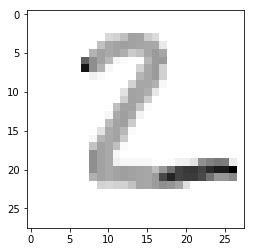

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  
print(val_acc)  

model.save('epic_num_reader.model')

new_model = tf.keras.models.load_model('epic_num_reader.model')

predictions = new_model.predict(x_test)

print(predictions)

import numpy as np

print(np.argmax(predictions[1]))



plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()